# Weather Analysis

01-01-2008 to 31-12-2017

| AIRPORT CODE | STATION NAME | STATION CODE |
| --- | --- | --- |
| BUF | BUFFALO NIAGARA INTERNATIONAL NY US | USW00014733 |
| DEL | NEW DELHI PALAM IN | IN022023000 |
| CCU | CALCUTTA DUM DUM IN | IN024141500 |

1. BUF Quarterly Mean Temperature Variation over 10 years
2. DEL Quarterly Mean Temperature Variation over 10 years
3. CCU Quarterly Mean Temperature Variation over 10 years


In [1]:
import csv

## Weather Data Source

The data that has been analysed have been cited from http://ncdc.noaa.gov/cdo-web/datatools vide order number 1263442. The data downloaded was in the form of a CSV containing weather records for a period of 10 years for 3 stations: USW00014733 (BUF), IN022023000 (DEL), IN024141500 (CCU).

The example format for the downloaded CSV file have been cited underneath.

```
"STATION","NAME","LATITUDE","LONGITUDE","ELEVATION","DATE","AWND","PRCP","SNOW","SNWD","TAVG","TMAX","TMIN","WT01","WT02","WT03","WT04","WT05","WT06","WT07","WT08","WT09","WT11","WT13","WT14","WT15","WT16","WT17","WT18","WT21","WT22"

"USW00014733","BUFFALO NIAGARA INTERNATIONAL NY US","42.9408","-78.7358","218.2","2008-01-01","5.1","8.9","58.0","25.0",,"1.7","-5.0","    1","    1",,,,,,,,,,,,"    1",,"    1",,"USW00014733","BUFFALO NIAGARA INTERNATIONAL NY US","42.9408","-78.7358","218.2","2008-01-02","5.6","0.0","5.0","76.0",,"-5.0","-10.6","    1",,,,,,,,,,"    1",,,,,"    1",,
```

In [2]:
filePath = './1263442.csv'
csvFile = open(filePath, mode = 'r', encoding = 'utf-8')

In [3]:
weatherDataReader = csv.DictReader(csvFile)

## Weather Analysis

The quarterly mean temperature of an area is calculated over a 3 months period of time and is the mean of the highest recorded temperature and the lowest recorded temperature for the given period of time. In the metric system temperature is expressed in °C (degree celsius).

Daily records of weather data for a particular station can be used to calculate the quarterly mean temperature of an area.

The labels of the different quarters and the corresponding months for each quarter.

In [4]:
meanPeriods = ['{}Q{}'.format(year, quarter) for year in range(2008, 2018) 
               for quarter in range(1, 5)]

In [5]:
months = {}
for meanPeriod in meanPeriods:
    (year, quarter) = meanPeriod.split('Q')
    quarter = int(quarter)
    months[meanPeriod] = ['%s-%02d' % (year, month) for month in range((quarter - 1) * 3 + 1, quarter * 3 + 1)]

In [6]:
print(meanPeriods)

['2008Q1', '2008Q2', '2008Q3', '2008Q4', '2009Q1', '2009Q2', '2009Q3', '2009Q4', '2010Q1', '2010Q2', '2010Q3', '2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4']


List of weather stations.

In [7]:
stations = {
    'USW00014733': 'BUFFALO NIAGARA INTERNATIONAL NY US',
    'IN022023000': 'NEW DELHI PALAM IN', 
    'IN024141500': 'CALCUTTA DUM DUM IN'
}

In [8]:
weatherRecords = []

for stationCode in stations:

    for weatherRecord in weatherDataReader:
        if weatherRecord['STATION'] != stationCode:
            break
        
        weatherRecords.append({
            'station': weatherRecord['STATION'],
            'date': weatherRecord['DATE'],
            'tmax': weatherRecord['TMAX'],
            'tmin': weatherRecord['TMIN'],
            'tavg': weatherRecord['TAVG']
        })

Quarterly city temperatures of different stations. Will find the mean temperature of each quarter.

In [9]:
quarterlyCityTemperatures = {}

for stationCode in stations:
    quarterlyCityTemperatures[stationCode] = {}
    for meanPeriod in meanPeriods:
        currentMonths = months[meanPeriod]
        
        tempMax = -1000.00
        tempMin = 1000.00
        
        quarterlyRecords = []
        for month in currentMonths:
            quarterlyRecords += list(filter(
                lambda record: record['date'].startswith(month), weatherRecords
            ))
            
        tempMax = -9999.99
        tempMin = 1000.00
        for record in quarterlyRecords:
            try: 
                if float(record['tmax']) > tempMax:
                    tempMax = float(record['tmax'])
            except ValueError:
                pass
            try:
                if float(record['tavg']) > tempMax:
                    tempMax = float(record['tavg'])
            except ValueError:
                pass
            try:
                if float(record['tmin']) < tempMin:
                    tempMin = float(record['tmin'])
            except ValueError:
                pass
            try:
                if float(record['tavg']) < tempMin:
                    tempMin = float(record['tavg'])
            except ValueError:
                pass
            
        tempMean = (tempMax + tempMin) / 2
        quarterlyCityTemperatures[stationCode][meanPeriod] = tempMean

The mean temperatures of different stations across different quarters.

In [10]:
print(quarterlyCityTemperatures)

{'USW00014733': {'2008Q1': 10.85, '2008Q2': 18.05, '2008Q3': 21.75, '2008Q4': 10.700000000000001, '2009Q1': 8.099999999999998, '2009Q2': 18.6, '2009Q3': 20.8, '2009Q4': 10.2, '2010Q1': 10.400000000000002, '2010Q2': 20.8, '2010Q3': 21.700000000000003, '2010Q4': 12.000000000000002, '2011Q1': 7.200000000000001, '2011Q2': 18.25, '2011Q3': 21.45, '2011Q4': 13.150000000000002, '2012Q1': 10.950000000000001, '2012Q2': 19.549999999999997, '2012Q3': 21.7, '2012Q4': 15.0, '2013Q1': 9.6, '2013Q2': 19.650000000000002, '2013Q3': 20.2, '2013Q4': 9.149999999999999, '2014Q1': 9.5, '2014Q2': 18.450000000000003, '2014Q3': 21.25, '2014Q4': 12.95, '2015Q1': 6.6, '2015Q2': 17.8, '2015Q3': 22.75, '2015Q4': 15.5, '2016Q1': 7.049999999999999, '2016Q2': 19.1, '2016Q3': 23.8, '2016Q4': 12.450000000000001, '2017Q1': 12.650000000000002, '2017Q2': 23.25, '2017Q3': 22.400000000000002, '2017Q4': 9.500000000000002}, 'IN022023000': {'2008Q1': 10.85, '2008Q2': 18.05, '2008Q3': 21.75, '2008Q4': 10.700000000000001, '2009Q

In [14]:
from matplotlib import pyplot
%matplotlib notebook
pyplot.rcParams['figure.figsize'] = [8,6]

# Weather Graph

X Axis Labels

In [15]:
print('X Axis: ', end = ' ')
for index in range(len(meanPeriods)):
    print('(%d, %s)' % (index, meanPeriods[index]), end = ' ')

X Axis:  (0, 2008Q1) (1, 2008Q2) (2, 2008Q3) (3, 2008Q4) (4, 2009Q1) (5, 2009Q2) (6, 2009Q3) (7, 2009Q4) (8, 2010Q1) (9, 2010Q2) (10, 2010Q3) (11, 2010Q4) (12, 2011Q1) (13, 2011Q2) (14, 2011Q3) (15, 2011Q4) (16, 2012Q1) (17, 2012Q2) (18, 2012Q3) (19, 2012Q4) (20, 2013Q1) (21, 2013Q2) (22, 2013Q3) (23, 2013Q4) (24, 2014Q1) (25, 2014Q2) (26, 2014Q3) (27, 2014Q4) (28, 2015Q1) (29, 2015Q2) (30, 2015Q3) (31, 2015Q4) (32, 2016Q1) (33, 2016Q2) (34, 2016Q3) (35, 2016Q4) (36, 2017Q1) (37, 2017Q2) (38, 2017Q3) (39, 2017Q4) 

<IPython.core.display.Javascript object>


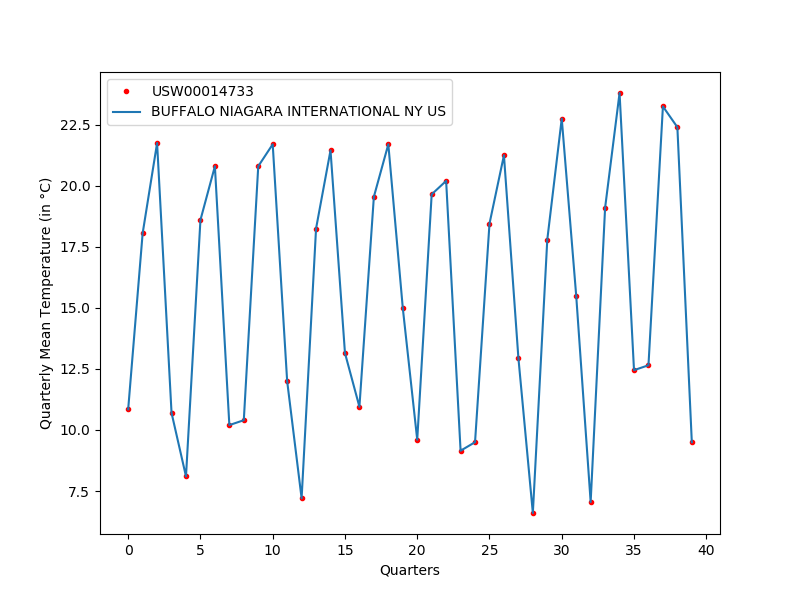

<IPython.core.display.Javascript object>


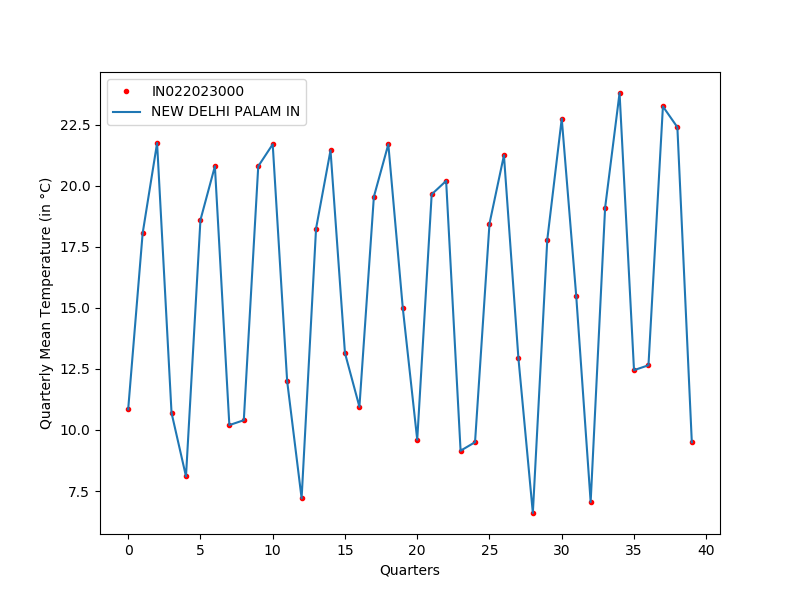

<IPython.core.display.Javascript object>


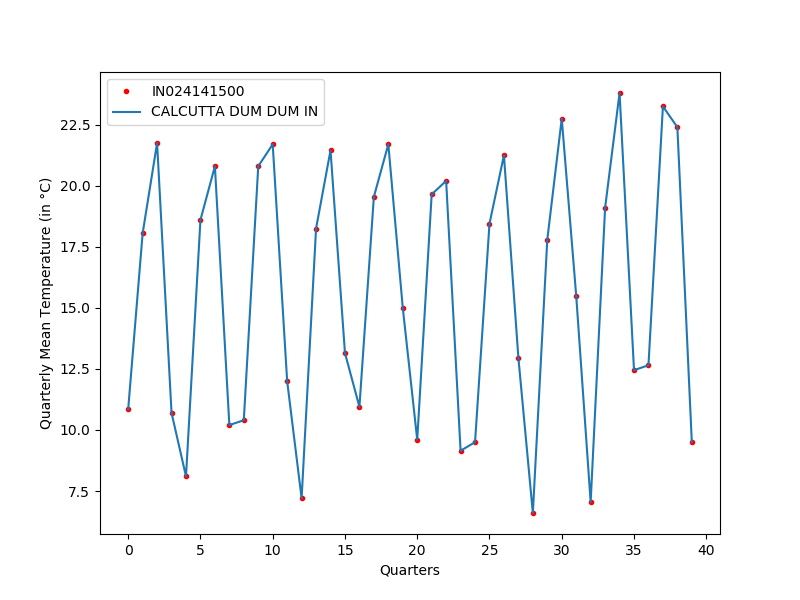

In [16]:
for stationCode in stations:
    pyplot.figure()
    X = range(len(quarterlyCityTemperatures[stationCode].keys()))
    y = quarterlyCityTemperatures[stationCode].values()
    
    pyplot.plot(X, y, 'ro', markersize=3)
    pyplot.plot(X, y)
    
    pyplot.legend([stationCode, stations[stationCode]])
    
    pyplot.ylabel('Quarterly Mean Temperature (in °C)')
    pyplot.xlabel('Quarters')

@selfLink: https://github.com/swghosh/weather-graph-ppt-temp/blob/master/WeatherAnalysis.ipynb